In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [14]:
pf = pd.read_csv('/content/user data - Sheet1.csv')
pf.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7,John Smith,35,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7,David Lee,45,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14,Sarah Johnson,29,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200


In [15]:
pf['Start date'] = pd.to_datetime(pf['Start date'])
pf['End date'] = pd.to_datetime(pf['End date'])

In [16]:
pf.fillna(method='ffill', inplace=True)

<ipython-input-16-94347733716f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pf.fillna(method='ffill', inplace=True)


In [17]:
if 'Duration (days)' not in pf.columns:
    pf['Duration (days)'] = (pf['End date'] - pf['Start date']).dt.days

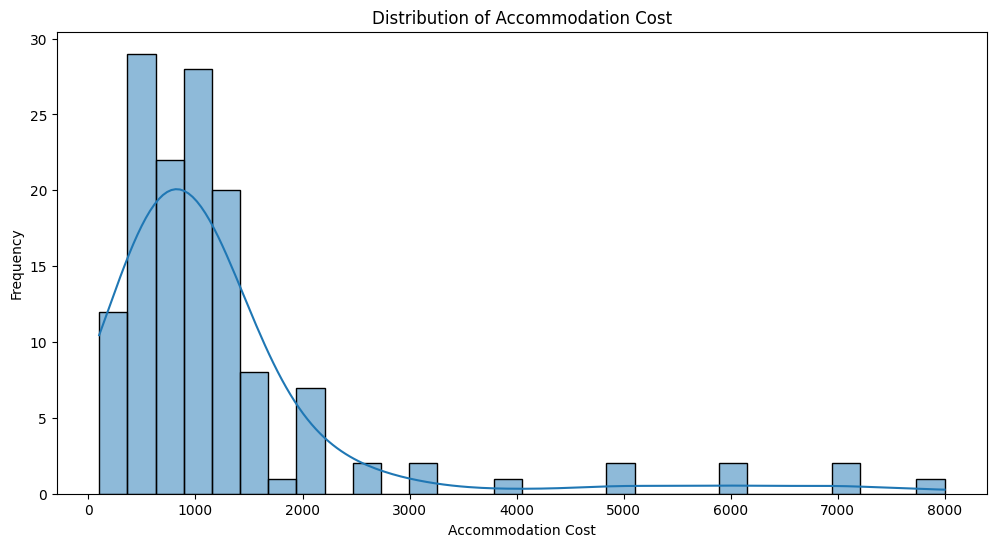

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(pf['Accommodation cost'], bins=30, kde=True)
plt.title('Distribution of Accommodation Cost')
plt.xlabel('Accommodation Cost')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

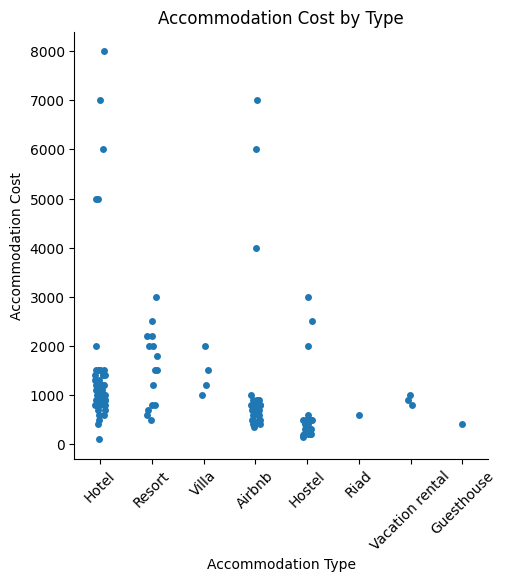

In [36]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Accommodation type', y='Accommodation cost', data=pf)
plt.title('Accommodation Cost by Type')
plt.xlabel('Accommodation Type')
plt.ylabel('Accommodation Cost')
plt.xticks(rotation=45)
plt.show()

In [20]:
features = ['Duration (days)', 'Traveler age', 'Accommodation cost', 'Transportation cost']
X = pf[features]
y = pf['Accommodation cost']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test_scaled)

In [25]:
print("Model Evaluation:")
print(f"R^2 Score: {model.score(X_test_scaled, y_test)}")

Model Evaluation:
R^2 Score: 1.0


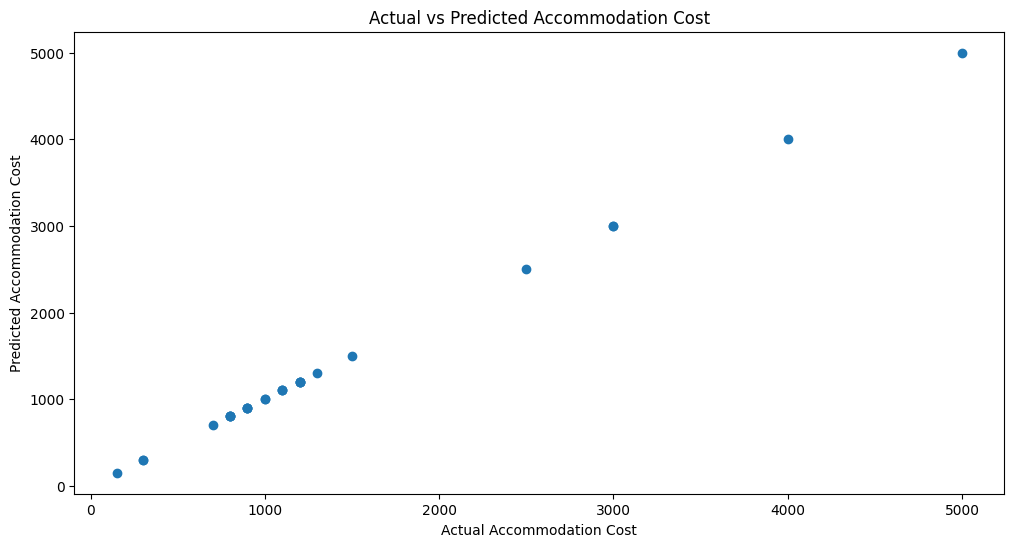

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Accommodation Cost')
plt.ylabel('Predicted Accommodation Cost')
plt.title('Actual vs Predicted Accommodation Cost')
plt.show()

In [27]:
print("Summary Report:")
print(f"Mean Absolute Error: {np.mean(np.abs(y_test - y_pred))}")
print(f"Mean Squared Error: {np.mean((y_test - y_pred)**2)}")
print(f"Root Mean Squared Error: {np.sqrt(np.mean((y_test - y_pred)**2))}")
pf.to_csv('/content/processed_travel_blog_data.csv', index=False)
print("Processed dataset saved.")

Summary Report:
Mean Absolute Error: 4.34446129864747e-13
Mean Squared Error: 3.974344349375875e-25
Root Mean Squared Error: 6.304240120249129e-13
Processed dataset saved.


In [28]:
pf =  pd.read_csv('/content/processed_travel_blog_data.csv')

In [29]:
pf.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",2023-05-01,2023-05-08,7,John Smith,35,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",2023-06-15,2023-06-20,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,7,David Lee,45,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",2023-08-15,2023-08-29,14,Sarah Johnson,29,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",2023-09-10,2023-09-17,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200
